#10ED02_ 05_estadística
##Ejercicio Dirigido: Análisis Estadístico con Pandas
###Enunciado:
En este ejercicio, trabajarás con un conjunto de datos sobre flores Iris y aplicarás diversas funciones
estadísticas utilizando Pandas. También realizarás algunas visualizaciones de los datos.
1. Carga el conjunto de datos iris_dataset.csv en un DataFrame llamado df.
2. Muestra las primeras 5 filas del DataFrame.
3. Calcula y muestra las estadísticas descriptivas del DataFrame utilizando el método describe.
4. Obtén y muestra el valor máximo de la columna SepalLength.
5. Calcula y muestra la varianza de la columna PetalLength.
6. Calcula y muestra la mediana de la columna PetalWidth.
7. Calcula y muestra la suma y la suma acumulativa (cumsum) de los primeros 5 valores de la columna
PetalWidth.
8. Muestra el conteo de valores únicos de los primeros 5 valores de la columna PetalLength.
9. Realiza un gráfico de línea de la columna PetalWidth.
10. Realiza un histograma de la columna PetalLength.
11. Calcula y muestra la matriz de correlación del DataFrame.
12. Transforma la matriz de correlación en un formato largo utilizando melt y muestra el resultado.
13. Realiza un gráfico de dispersión (scatter plot) entre PetalLength y PetalWidth.
14. Agrupa los datos por la columna Class y realiza un diagrama de caja (boxplot) para cada grupo.
15. Crea una tabla dinámica (pivot table) que muestre la media de PetalLength para cada clase (Class) y
realiza un gráfico de barras de esta tabla dinámica.

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/datasets/iris.csv')

In [3]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df['sepal.length'].max()

7.9

In [8]:
df['petal.length'].var()

3.1162778523489942

In [9]:
df['petal.width'].mean()

1.1993333333333336

In [11]:
df['petal.width'].cumsum().head()

,petal.width
0,0.2
1,0.4
2,0.6
3,0.8
4,1.0


In [12]:
df['petal.length'].value_counts().head()

,count
petal.length,
1.4,13
1.5,13
5.1,8
4.5,8
1.6,7


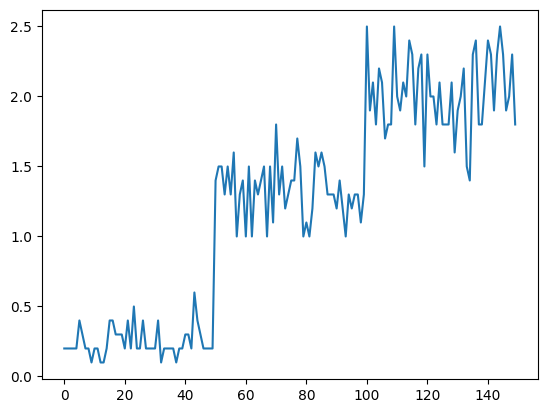

In [13]:
import matplotlib.pyplot as plt

df['petal.width'].plot(kind='line')
plt.show()

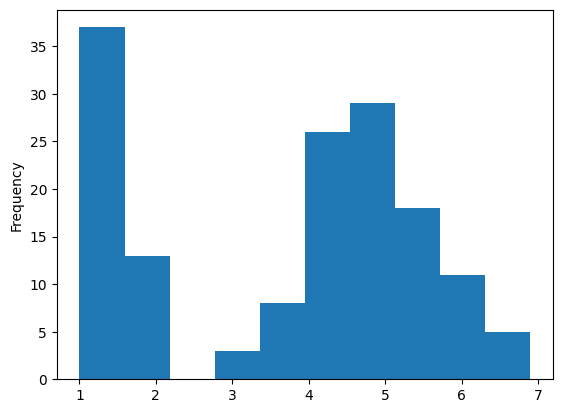

In [14]:
df['petal.length'].plot(kind='hist')
plt.show()

In [17]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [18]:
correlation_matrix_long = correlation_matrix.melt(ignore_index=False)
correlation_matrix_long

,variable,value
sepal.length,sepal.length,1.000000
sepal.width,sepal.length,-0.117570
petal.length,sepal.length,0.871754
petal.width,sepal.length,0.817941
sepal.length,sepal.width,-0.117570
sepal.width,sepal.width,1.000000
petal.length,sepal.width,-0.428440
petal.width,sepal.width,-0.366126
sepal.length,petal.length,0.871754
sepal.width,petal.length,-0.428440


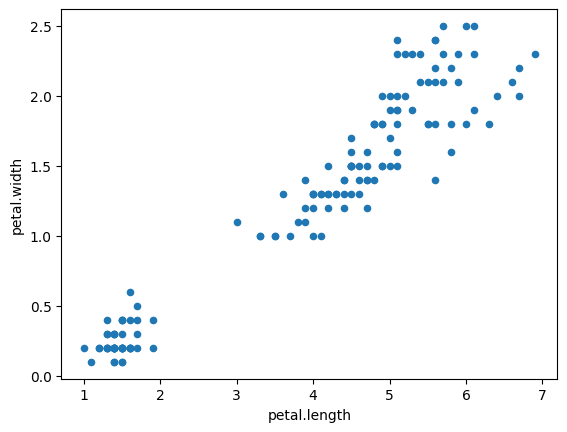

In [22]:
df.plot(kind='scatter', x='petal.length', y='petal.width')
plt.show()

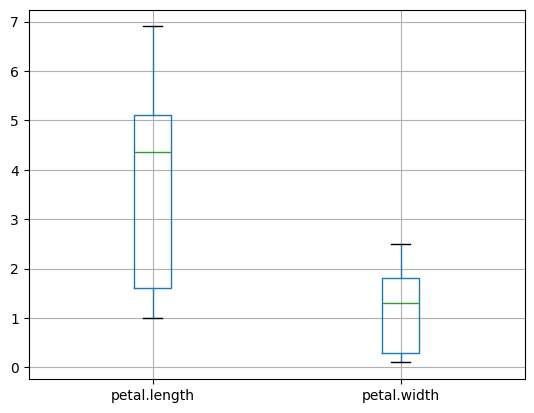

In [20]:
pd.plotting.boxplot(df[['petal.length', 'petal.width']])
plt.show()

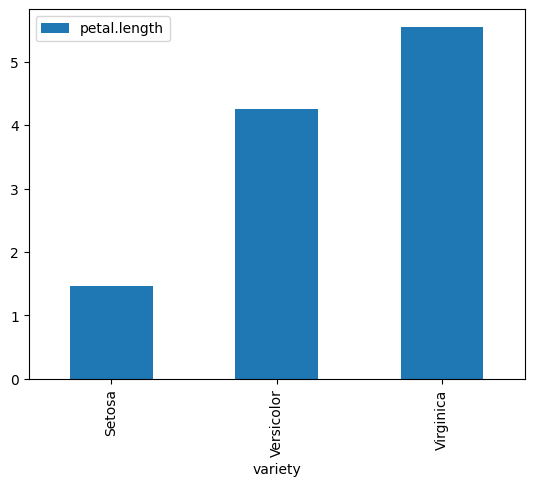

In [26]:
pivot_table = pd.pivot_table(df, values='petal.length', index='variety', aggfunc='mean') # Changed 'class' to 'variety'
pivot_table.plot(kind='bar')
plt.show()